In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Loading and constructing Datasets

In [175]:
import subprocess as sp
data_dir = sp.getoutput('src/data-dir.sh')
data_dir

'./datasets'

In [36]:
paths = Path(data_dir).rglob('*.jp*')
next(paths)

PosixPath('datasets/asl_dataset/p/hand2_p_bot_seg_5_cropped.jpeg')

In [43]:
from pathlib import Path

paths = Path(data_dir).rglob('*.jp*')
df = pd.DataFrame({ 'filepath': paths })
df

,filepath
0,datasets/asl_dataset/p/hand2_p_bot_seg_5_cropp...
1,datasets/asl_dataset/p/hand3_p_dif_seg_5_cropp...
2,datasets/asl_dataset/p/hand1_p_left_seg_3_crop...
3,datasets/asl_dataset/p/hand2_p_dif_seg_1_cropp...
4,datasets/asl_dataset/p/hand2_p_dif_seg_2_cropp...
...,...
203053,datasets/asl_alphabet_test/asl_alphabet_test/D...
203054,datasets/asl_alphabet_test/asl_alphabet_test/T...
203055,datasets/asl_alphabet_test/asl_alphabet_test/I...
203056,datasets/asl_alphabet_test/asl_alphabet_test/R...


In [47]:
df.to_csv(f'{data_dir}/index.csv', index=False)

In [121]:
df = pd.read_csv(f'{data_dir}/index.csv')
to_exclude = df['filepath'].str.contains('asl_alphabet_test') | \
             df['filepath'].str.contains('Pre-Processed')
df = df[~to_exclude].reset_index(drop=True)
df

,filepath
0,datasets/asl_dataset/p/hand2_p_bot_seg_5_cropp...
1,datasets/asl_dataset/p/hand3_p_dif_seg_5_cropp...
2,datasets/asl_dataset/p/hand1_p_left_seg_3_crop...
3,datasets/asl_dataset/p/hand2_p_dif_seg_1_cropp...
4,datasets/asl_dataset/p/hand2_p_dif_seg_2_cropp...
...,...
147525,datasets/asl_alphabet_train/asl_alphabet_train...
147526,datasets/asl_alphabet_train/asl_alphabet_train...
147527,datasets/asl_alphabet_train/asl_alphabet_train...
147528,datasets/asl_alphabet_train/asl_alphabet_train...


Extract class and image index from filename.

In [126]:
df['filename'] = df['filepath'].map(os.path.basename)
df['filename']

0          hand2_p_bot_seg_5_cropped.jpeg
1          hand3_p_dif_seg_5_cropped.jpeg
2         hand1_p_left_seg_3_cropped.jpeg
3          hand2_p_dif_seg_1_cropped.jpeg
4          hand2_p_dif_seg_2_cropped.jpeg
                       ...               
147525                           P706.jpg
147526                          P2422.jpg
147527                            P42.jpg
147528                          P1490.jpg
147529                          P1655.jpg
Name: filename, Length: 147530, dtype: object

In [142]:
df['class'] = df['filepath'].str.split('/').str[-2]
df['class']

0         p
1         p
2         p
3         p
4         p
         ..
147525    P
147526    P
147527    P
147528    P
147529    P
Name: class, Length: 120630, dtype: object

In [143]:
df = df[df['class'].str.match(r'^[a-zA-Z]$')] # keep alphabet only
df['class'] = df['class'].str.upper()
df

,filepath,class,filename
0,datasets/asl_dataset/p/hand2_p_bot_seg_5_cropp...,P,hand2_p_bot_seg_5_cropped.jpeg
1,datasets/asl_dataset/p/hand3_p_dif_seg_5_cropp...,P,hand3_p_dif_seg_5_cropped.jpeg
2,datasets/asl_dataset/p/hand1_p_left_seg_3_crop...,P,hand1_p_left_seg_3_cropped.jpeg
3,datasets/asl_dataset/p/hand2_p_dif_seg_1_cropp...,P,hand2_p_dif_seg_1_cropped.jpeg
4,datasets/asl_dataset/p/hand2_p_dif_seg_2_cropp...,P,hand2_p_dif_seg_2_cropped.jpeg
...,...,...,...
147525,datasets/asl_alphabet_train/asl_alphabet_train...,P,P706.jpg
147526,datasets/asl_alphabet_train/asl_alphabet_train...,P,P2422.jpg
147527,datasets/asl_alphabet_train/asl_alphabet_train...,P,P42.jpg
147528,datasets/asl_alphabet_train/asl_alphabet_train...,P,P1490.jpg


In [145]:
df['class'].sort_values().unique()

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype=object)

Save dataset to `.csv`

In [153]:
df.to_csv(f'{data_dir}/data.csv', index=False)

Find distribution of classes

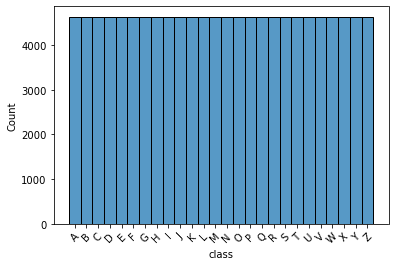

In [146]:
plt.xticks(rotation=45)
sns.histplot(data=df.sort_values('class'), x='class')

Display some example images.

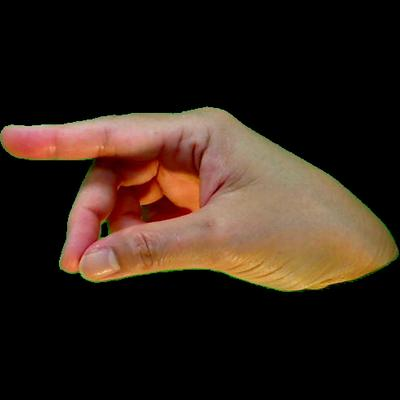

In [147]:
from IPython.display import Image
Image(filename=df['filepath'].values[0])

In [167]:
samples = df.sample(100)

In [168]:
len(samples)

100

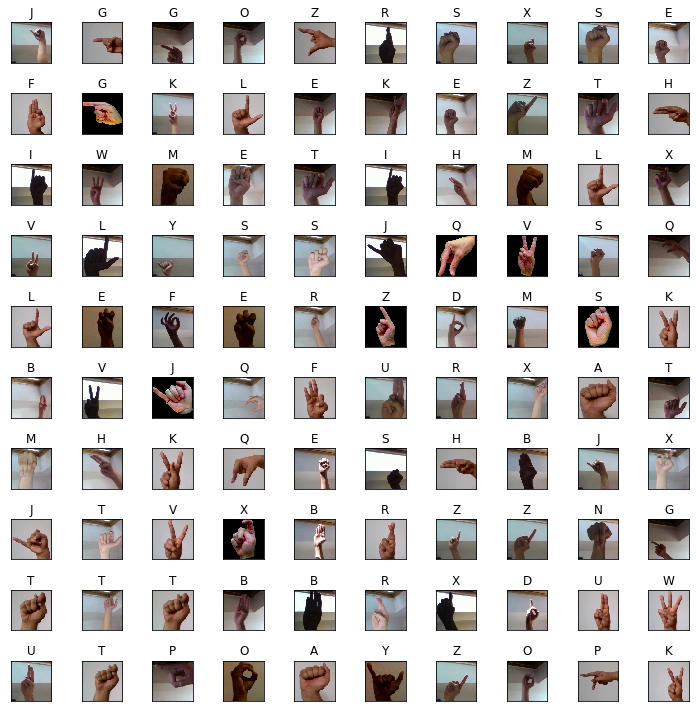

In [177]:
import matplotlib.pyplot as plt
from PIL import Image
f, ax = plt.subplots(10, 10, figsize=(10,10))
for i in range(len(samples)):
    classnm = samples['class'].values[i]
    path = samples['filepath'].values[i]
    plt.subplot(10, 10, i + 1, title=classnm)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    im = Image.open(path)
    plt.imshow(im)
plt.tight_layout()
plt.show()